In [ ]:
# Install and load required libraries
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MOFA2")
BiocManager::install("reticulate")



In [2]:


# Load the libraries
library(MOFA2)
library(reticulate)
# Connect to the mofapy2 package using basilisk
options(MOFA2_use_basilisk = TRUE)

# Generate synthetic RNA data
set.seed(123)
RNA <- matrix(rnorm(1000), nrow = 100, ncol = 10)
rownames(RNA) <- paste0("Gene", 1:100)
colnames(RNA) <- paste0("Sample", 1:10)

# Generate synthetic Methylation data
Methylation <- matrix(rnorm(1000), nrow = 100, ncol = 10)
rownames(Methylation) <- paste0("CpG", 1:100)
colnames(Methylation) <- paste0("Sample", 1:10)

# Generate synthetic Proteomics data
Proteomics <- matrix(rnorm(1000), nrow = 100, ncol = 10)
rownames(Proteomics) <- paste0("Protein", 1:100)
colnames(Proteomics) <- paste0("Sample", 1:10)

# Combine the data into a list
data <- list(
  "RNA" = RNA,
  "Methylation" = Methylation,
  "Proteomics" = Proteomics
)



In [3]:
# Create MOFA object
MOFAobject <- create_mofa(data)

# Print the MOFA object
print(MOFAobject)



Creating MOFA object from a list of matrices (features as rows, sample as columns)...




Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: RNA Methylation Proteomics 
 Number of features (per view): 100 100 100 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 10 
 


In [4]:
# Define the data options
data_opts <- get_default_data_options(MOFAobject)

# Define the model options, reducing the number of factors to 2
model_opts <- get_default_model_options(MOFAobject)
model_opts$num_factors <- 2

# Define the training options
train_opts <- get_default_training_options(MOFAobject)
train_opts$seed <- 42



In [5]:
# Prepare the MOFA object
MOFAobject <- prepare_mofa(MOFAobject, 
                           data_options = data_opts, 
                           model_options = model_opts, 
                           training_options = train_opts)



Checking data options...

Checking training options...

Checking model options...



In [6]:
# Specify an output filename for the trained model
output_file <- "trained_mofa_model.hdf5"



In [8]:
# Train the MOFA model with the specified output filename
MOFAobject <- run_mofa(MOFAobject, outfile = output_file,use_basilisk = TRUE)



Connecting to the mofapy2 package using basilisk. 
    Set 'use_basilisk' to FALSE if you prefer to manually set the python binary using 'reticulate'.

+ /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/0/bin/conda create --yes --prefix /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/MOFA2/1.12.1/mofa_env 'python=3.10.5' --quiet -c conda-forge

+ /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/0/bin/conda install --yes --prefix /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/MOFA2/1.12.1/mofa_env 'python=3.10.5' -c conda-forge

+ /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/0/bin/conda install --yes --prefix /Users/nbhadra/Library/Caches/org.R-project.R/R/basilisk/1.14.3/MOFA2/1.12.1/mofa_env -c conda-forge 'python=3.10.5' 'python=3.10.5' 'numpy=1.23.1' 'scipy=1.8.1' 'pandas=1.4.3' 'h5py=3.6.0' 'scikit-learn=1.1.1' 'dtw-python=1.2.2'



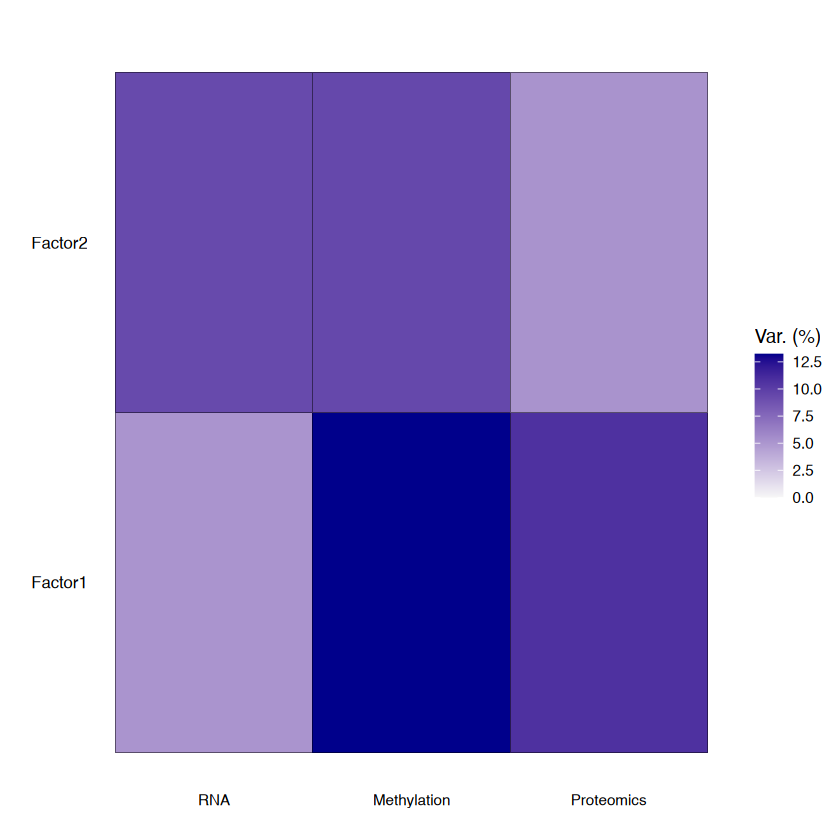

In [9]:

# Plot the variance explained by each factor
plot_variance_explained(MOFAobject)



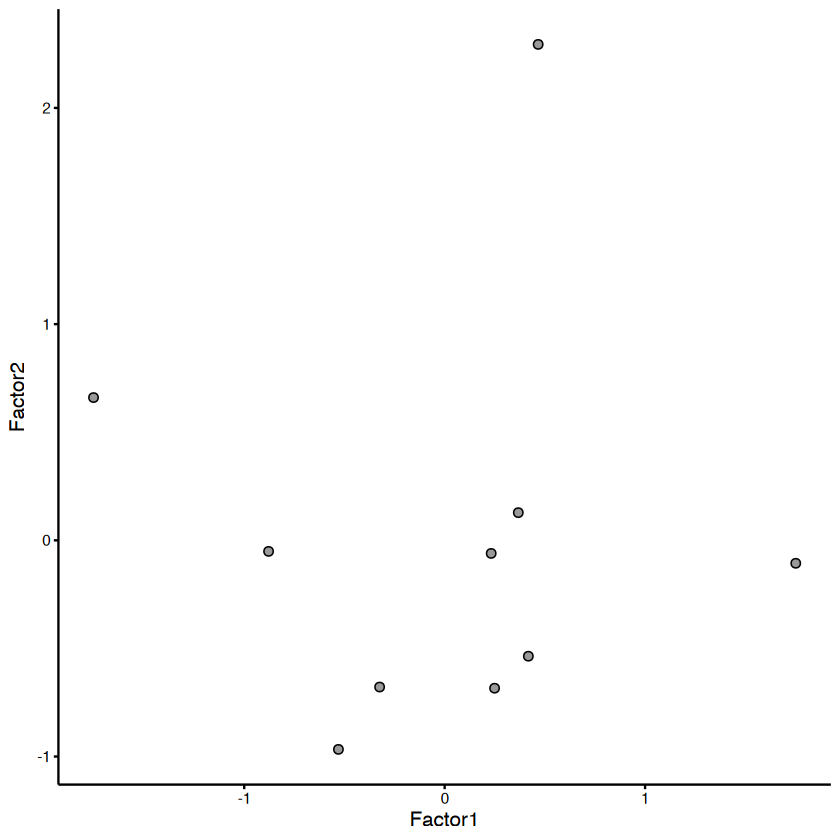

In [10]:
# Plot the factors
plot_factors(MOFAobject)



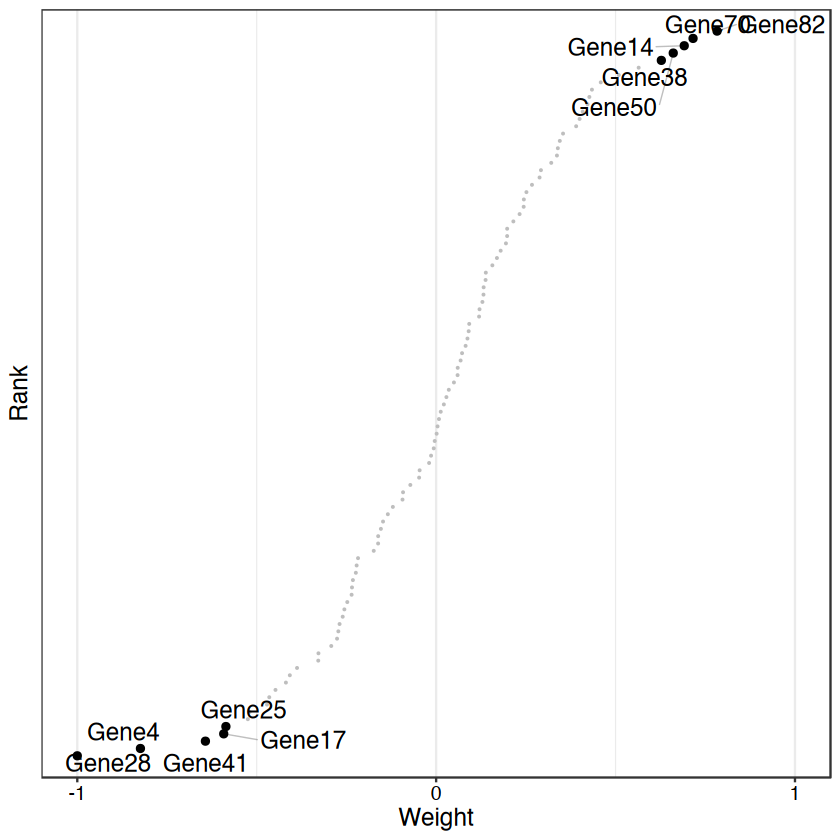

In [11]:
# Plot the loadings for the first factor
plot_weights(MOFAobject, view = "RNA", factor = 1)


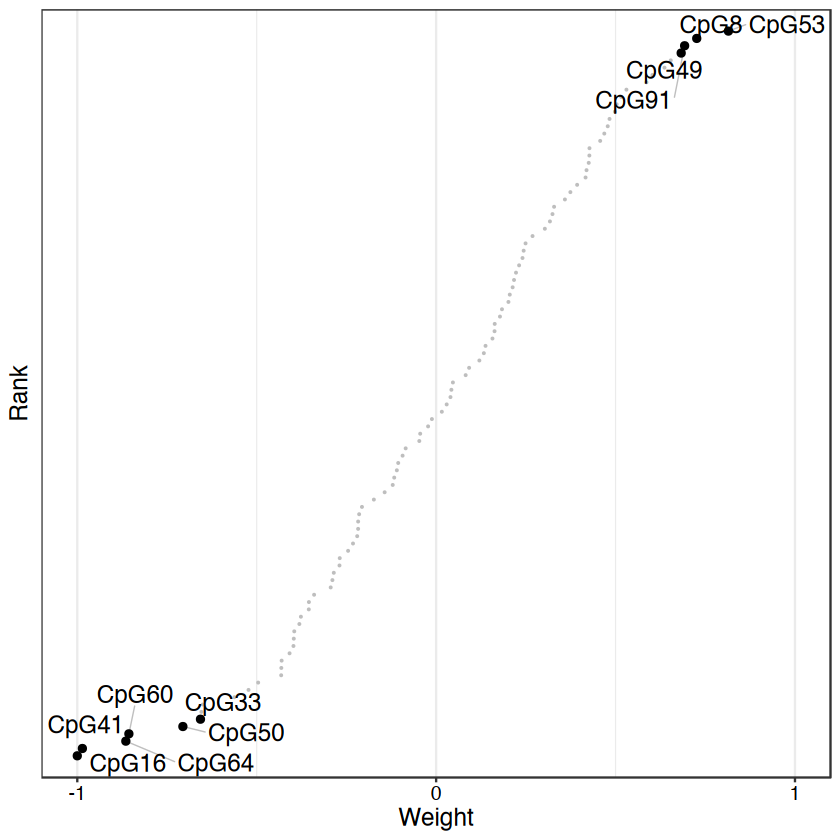

In [12]:
plot_weights(MOFAobject, view = "Methylation", factor = 1)



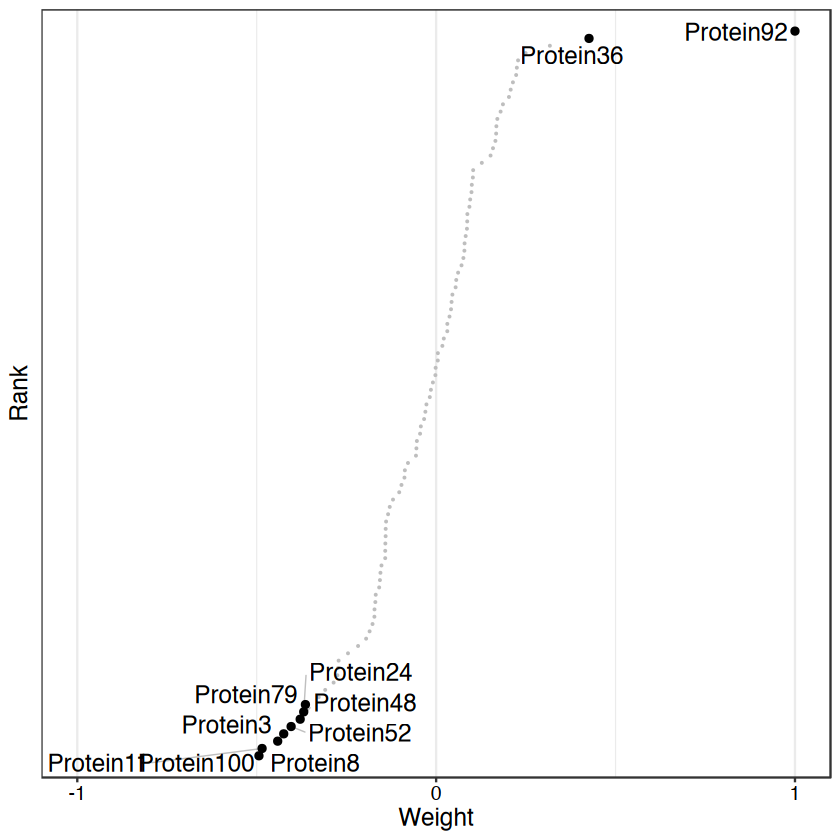

In [13]:
plot_weights(MOFAobject, view = "Proteomics", factor = 1)


In [ ]:
#https://rdrr.io/github/bioFAM/MOFA2/man/run_mofa.html